# Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
file_path = "india_housing_prices.csv"
df = pd.read_csv(file_path)


The ID column is usually a unique identifier for each record, like a serial number. It does not carry any meaningful information related to the target variable (in this case, the price) and has no predictive power. Including such a column might confuse the model into looking for patterns where none exist, While price per sq ft might seem like a helpful feature, in a price prediction problem where you are already trying to predict the total price, this column can introduce data leakage or multicollinearity.

In [5]:
print(df.head())

df = df.drop(columns=["ID","Price_per_SqFt"], errors="ignore")


   ID        State      City      Locality      Property_Type  BHK  \
0   1   Tamil Nadu   Chennai   Locality_84          Apartment    1   
1   2  Maharashtra      Pune  Locality_490  Independent House    3   
2   3       Punjab  Ludhiana  Locality_167          Apartment    2   
3   4    Rajasthan   Jodhpur  Locality_393  Independent House    2   
4   5    Rajasthan    Jaipur  Locality_466              Villa    4   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0          4740          489.76            0.10        1990  ...   
1          2364          195.52            0.08        2008  ...   
2          3642          183.79            0.05        1997  ...   
3          2741          300.29            0.11        1991  ...   
4          4823          182.90            0.04        2002  ...   

  Age_of_Property  Nearby_Schools  Nearby_Hospitals  \
0              35              10                 3   
1              17               8                 1   
2    

In [6]:
df.head()

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Year_Built,Furnished_Status,Floor_No,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,1990,Furnished,22,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,2008,Unfurnished,21,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,1997,Semi-furnished,19,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,1991,Furnished,21,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,2002,Semi-furnished,3,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [7]:
df.describe()

,BHK,Size_in_SqFt,Price_in_Lakhs,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2.999396,2749.813216,254.586854,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,1.415521,1300.606954,141.349921,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,500.000000,10.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,1623.000000,132.550000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,3.000000,2747.000000,253.870000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,4.000000,3874.000000,376.880000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,5.000000,5000.000000,500.000000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [8]:
df.isnull().sum()

State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           250000 non-null  object 
 1   City                            250000 non-null  object 
 2   Locality                        250000 non-null  object 
 3   Property_Type                   250000 non-null  object 
 4   BHK                             250000 non-null  int64  
 5   Size_in_SqFt                    250000 non-null  int64  
 6   Price_in_Lakhs                  250000 non-null  float64
 7   Year_Built                      250000 non-null  int64  
 8   Furnished_Status                250000 non-null  object 
 9   Floor_No                        250000 non-null  int64  
 10  Total_Floors                    250000 non-null  int64  
 11  Age_of_Property                 250000 non-null  int64  
 12  Nearby_Schools  

# EDA (Exploratory Data Analysis)

Exploratory Data Analysis (EDA) is a crucial step in any data science project that helps to understand the structure, patterns, and relationships within the dataset. Before building any predictive model, it is important to perform EDA to gain insights, detect anomalies, and identify patterns that can inform preprocessing decisions and model selection.

C:\Users\anish\AppData\Local\Temp\ipykernel_9708\3839150979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='viridis',order=df[cols].value_counts().index)


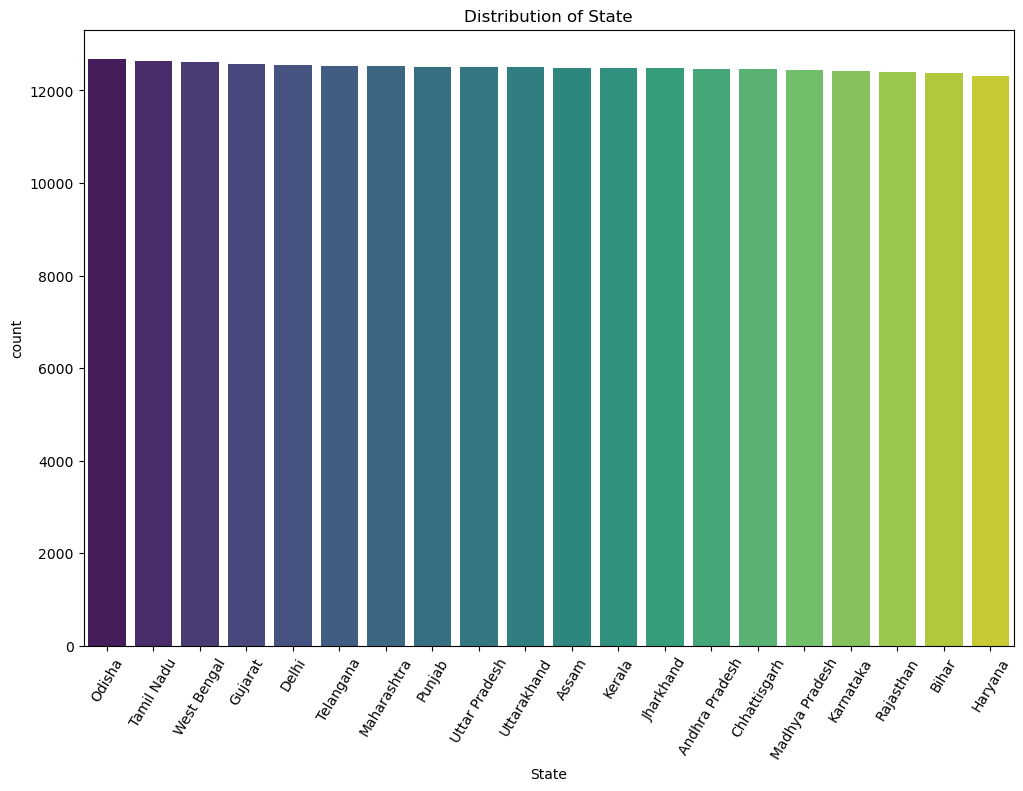

C:\Users\anish\AppData\Local\Temp\ipykernel_9708\3839150979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='viridis',order=df[cols].value_counts().index)


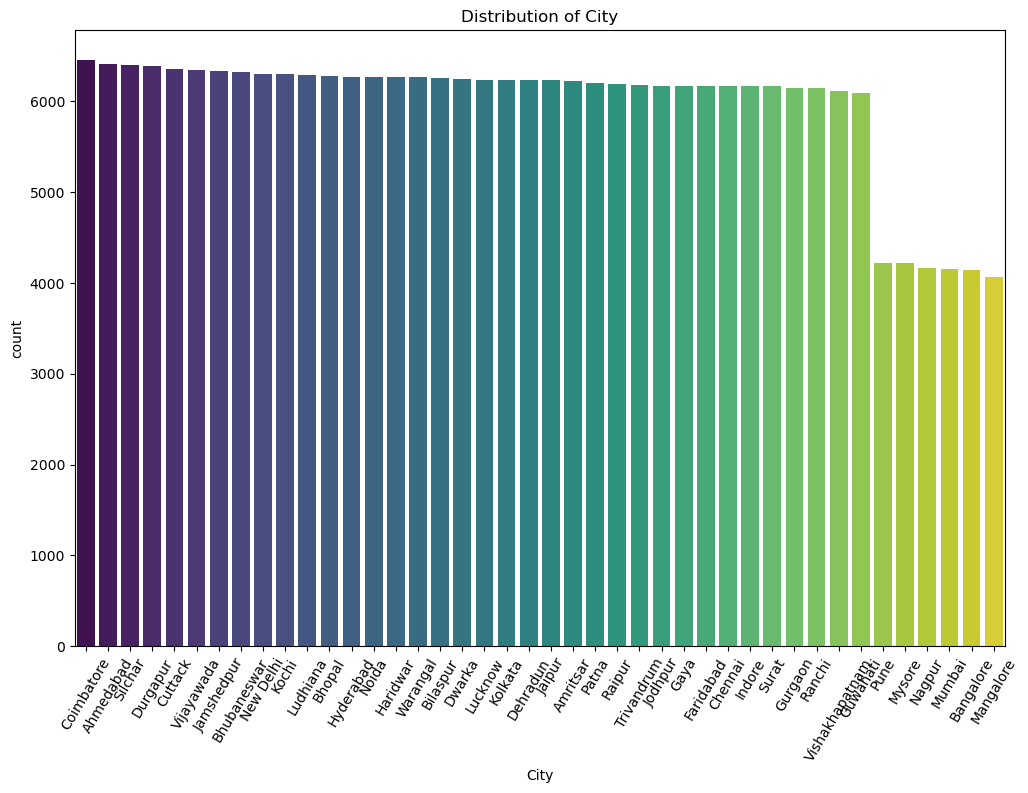

C:\Users\anish\AppData\Local\Temp\ipykernel_9708\3839150979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='viridis',order=df[cols].value_counts().index)


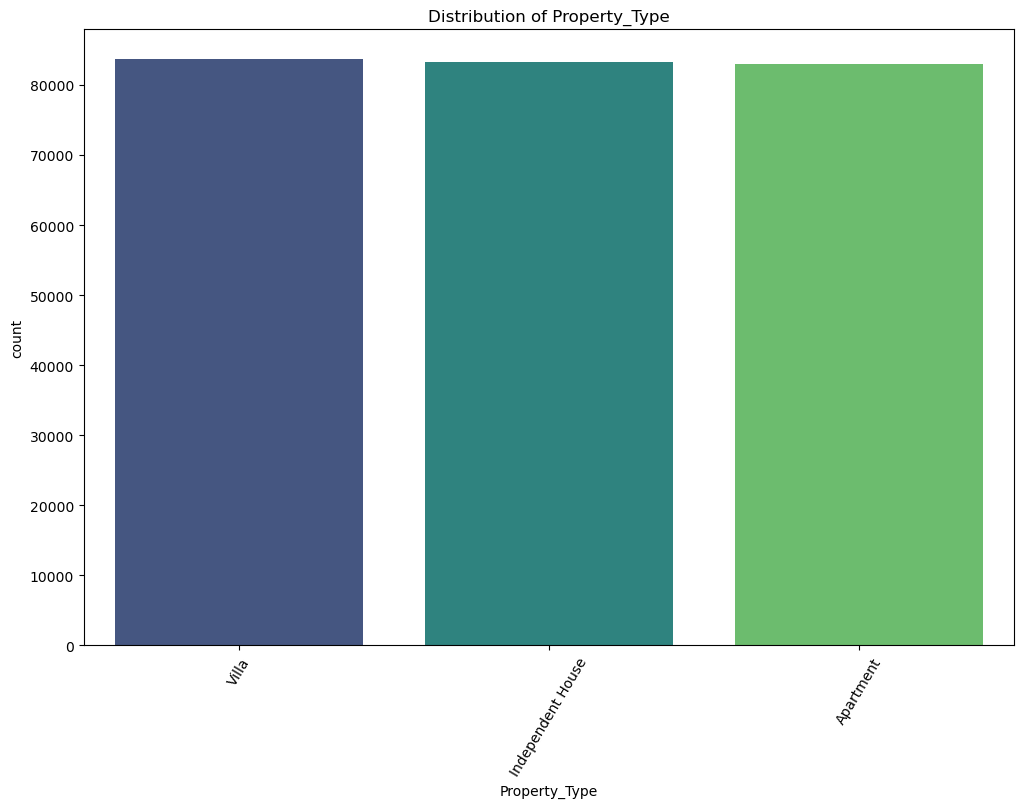

C:\Users\anish\AppData\Local\Temp\ipykernel_9708\3839150979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='viridis',order=df[cols].value_counts().index)


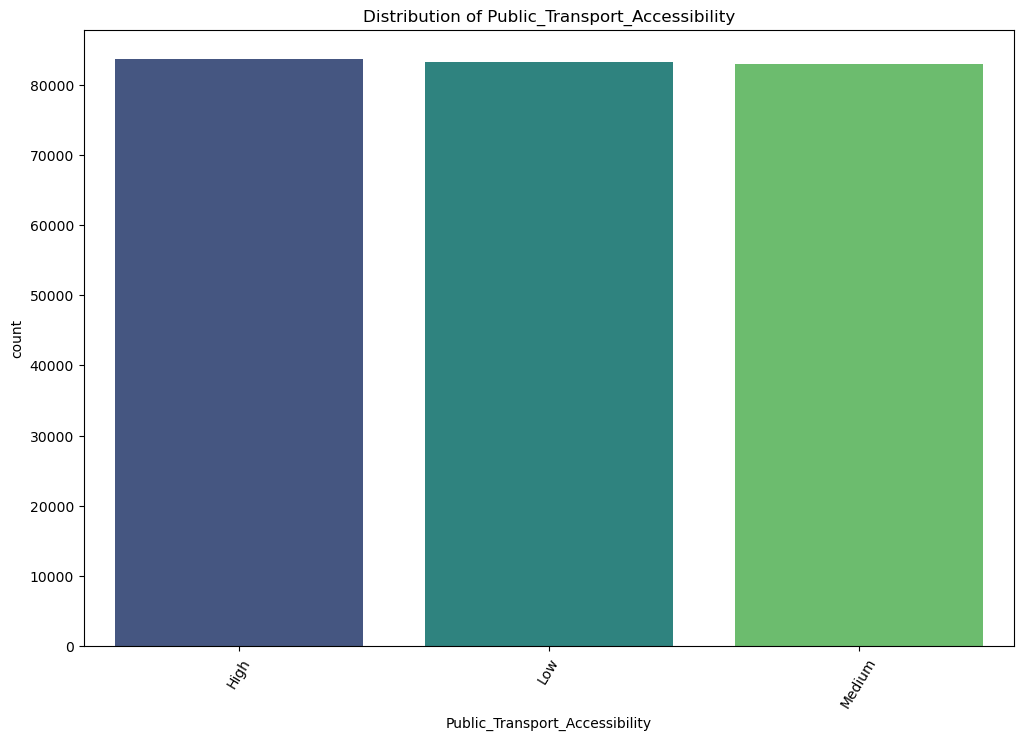

C:\Users\anish\AppData\Local\Temp\ipykernel_9708\3839150979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='viridis',order=df[cols].value_counts().index)


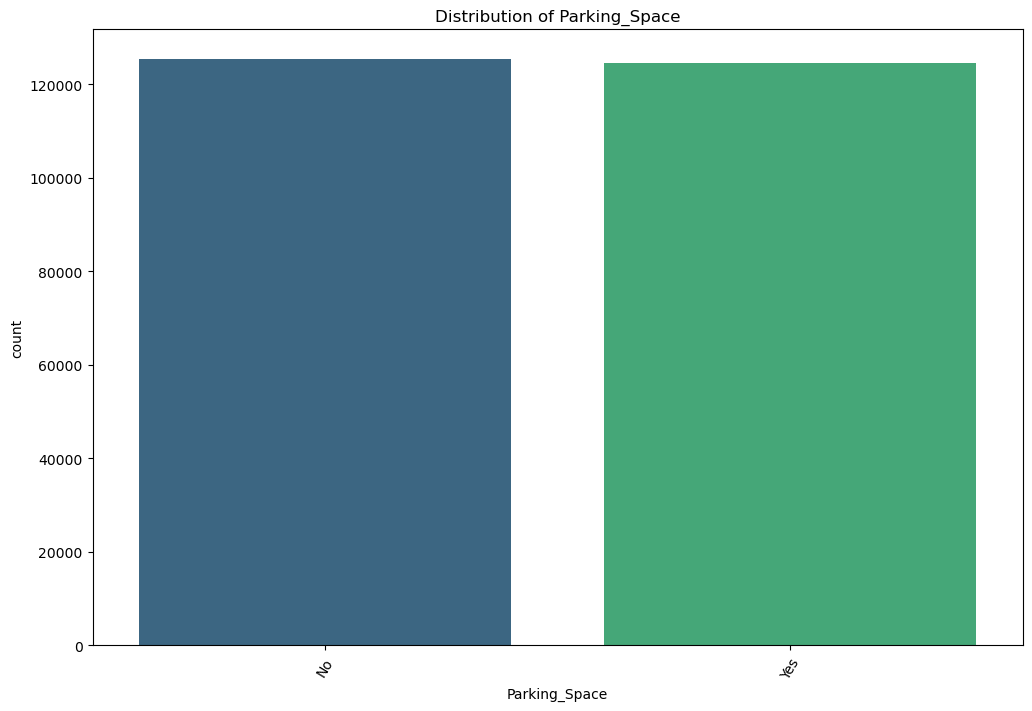

C:\Users\anish\AppData\Local\Temp\ipykernel_9708\3839150979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='viridis',order=df[cols].value_counts().index)


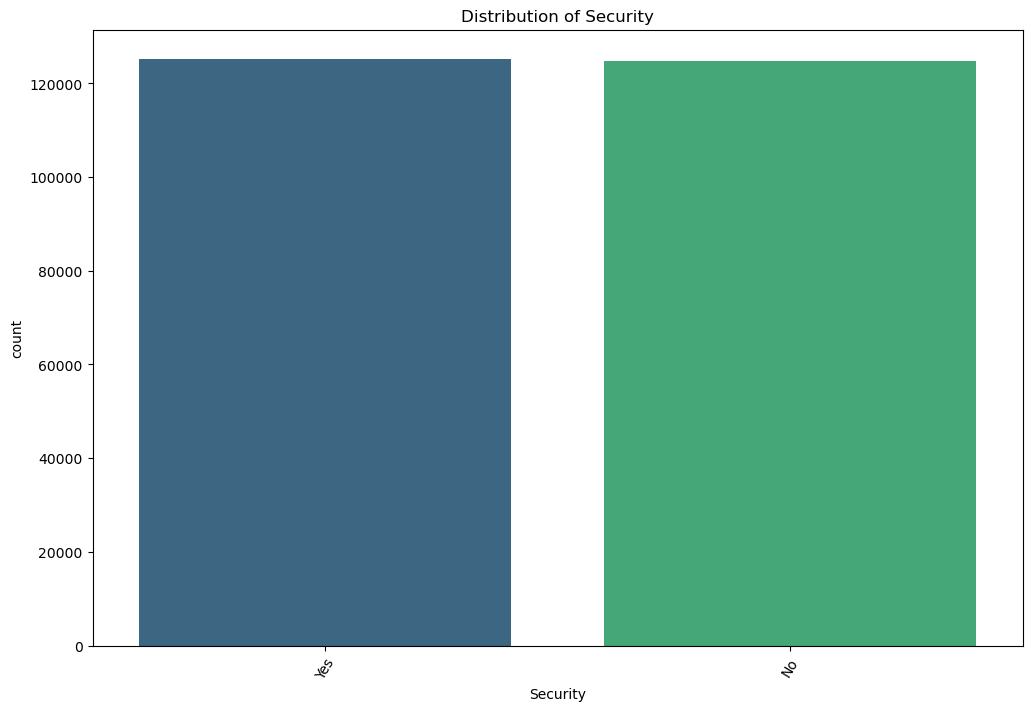

C:\Users\anish\AppData\Local\Temp\ipykernel_9708\3839150979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='viridis',order=df[cols].value_counts().index)


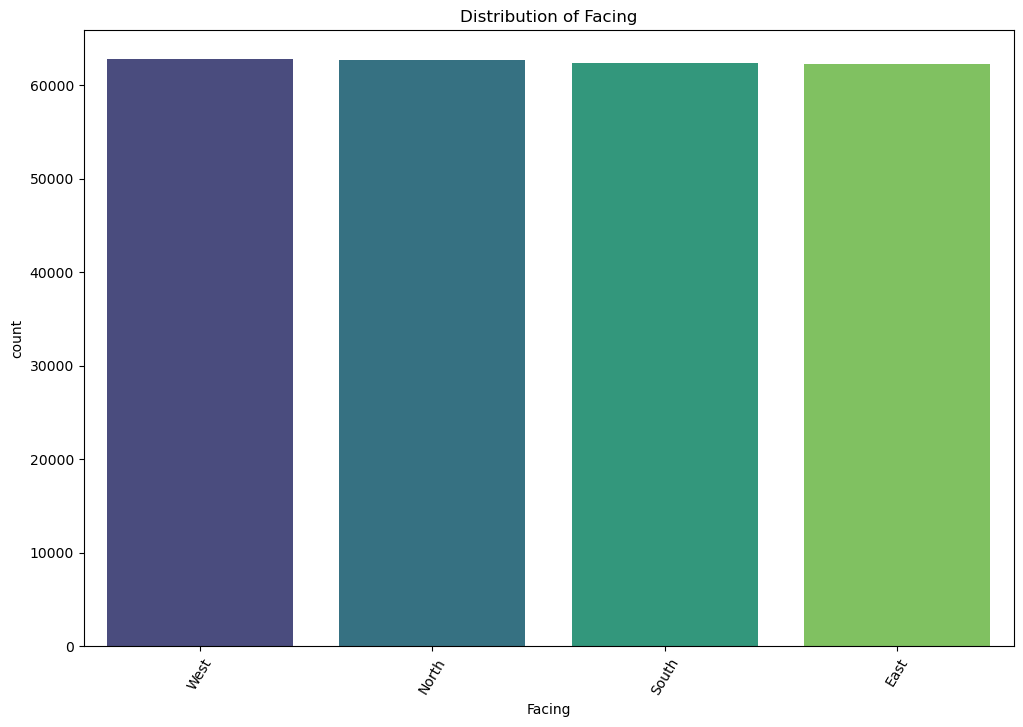

C:\Users\anish\AppData\Local\Temp\ipykernel_9708\3839150979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='viridis',order=df[cols].value_counts().index)


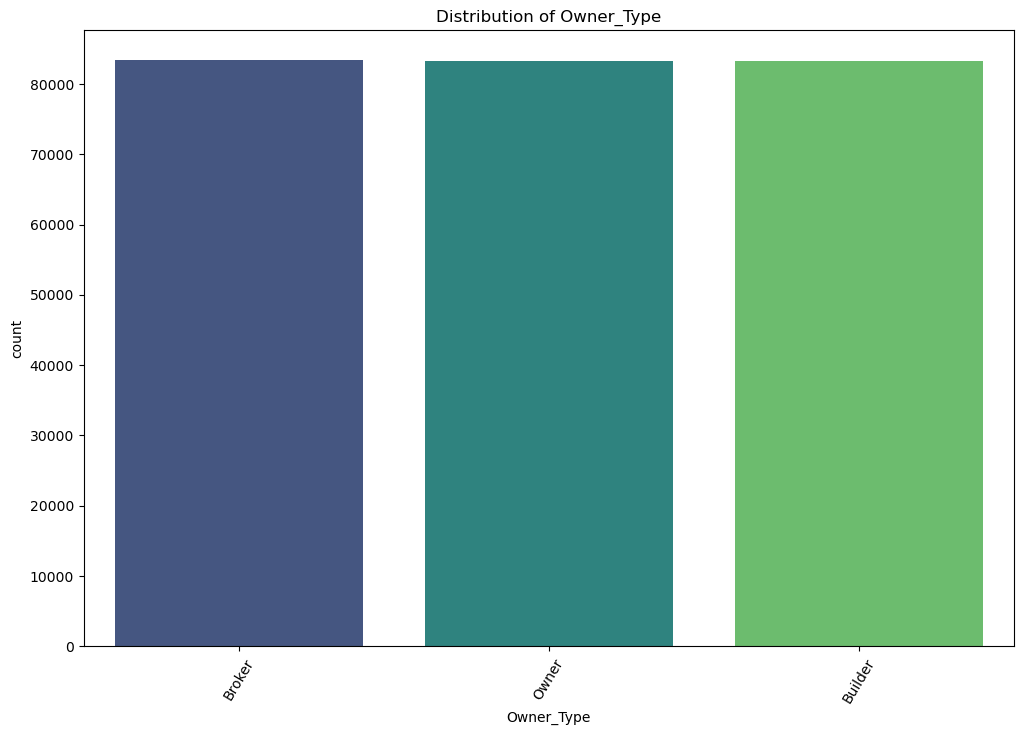

C:\Users\anish\AppData\Local\Temp\ipykernel_9708\3839150979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='viridis',order=df[cols].value_counts().index)


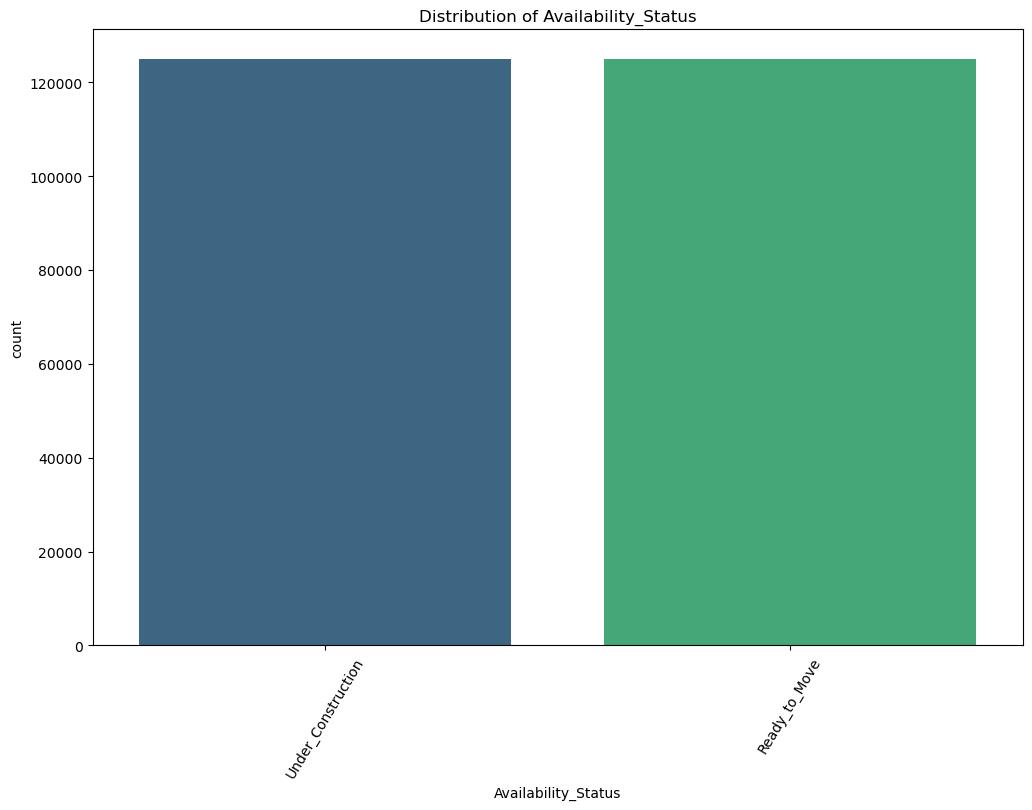

In [12]:
categorical_cols=['State','City','Property_Type','Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Facing', 'Owner_Type',
       'Availability_Status']
for cols in categorical_cols:
    plt.figure(figsize=(12,8))
    sns.countplot(data=df,x=cols,palette='viridis',order=df[cols].value_counts().index)
    plt.title(f'Distribution of {cols}')
    plt.xticks(rotation=59)
    plt.show()

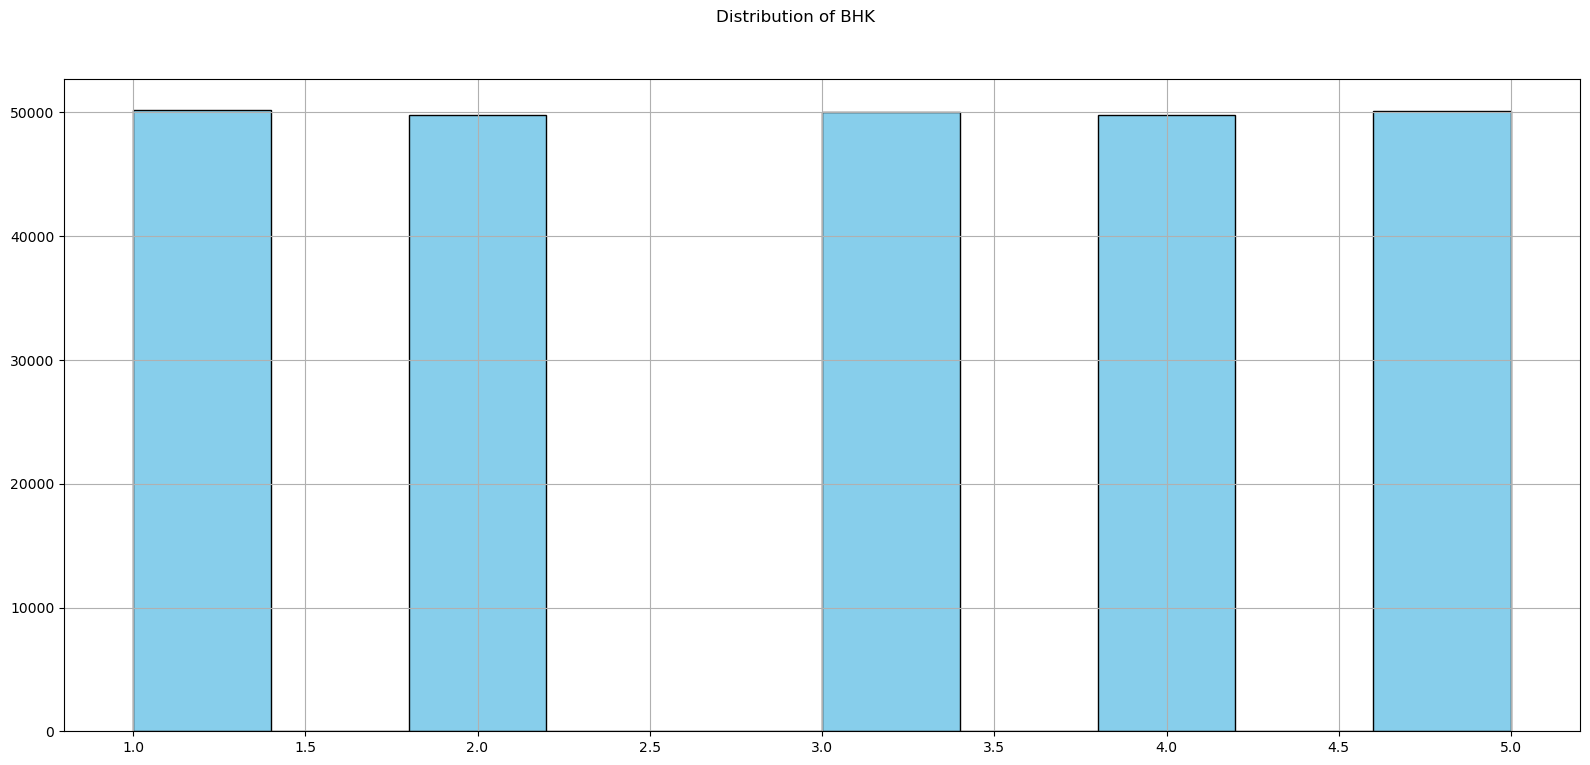

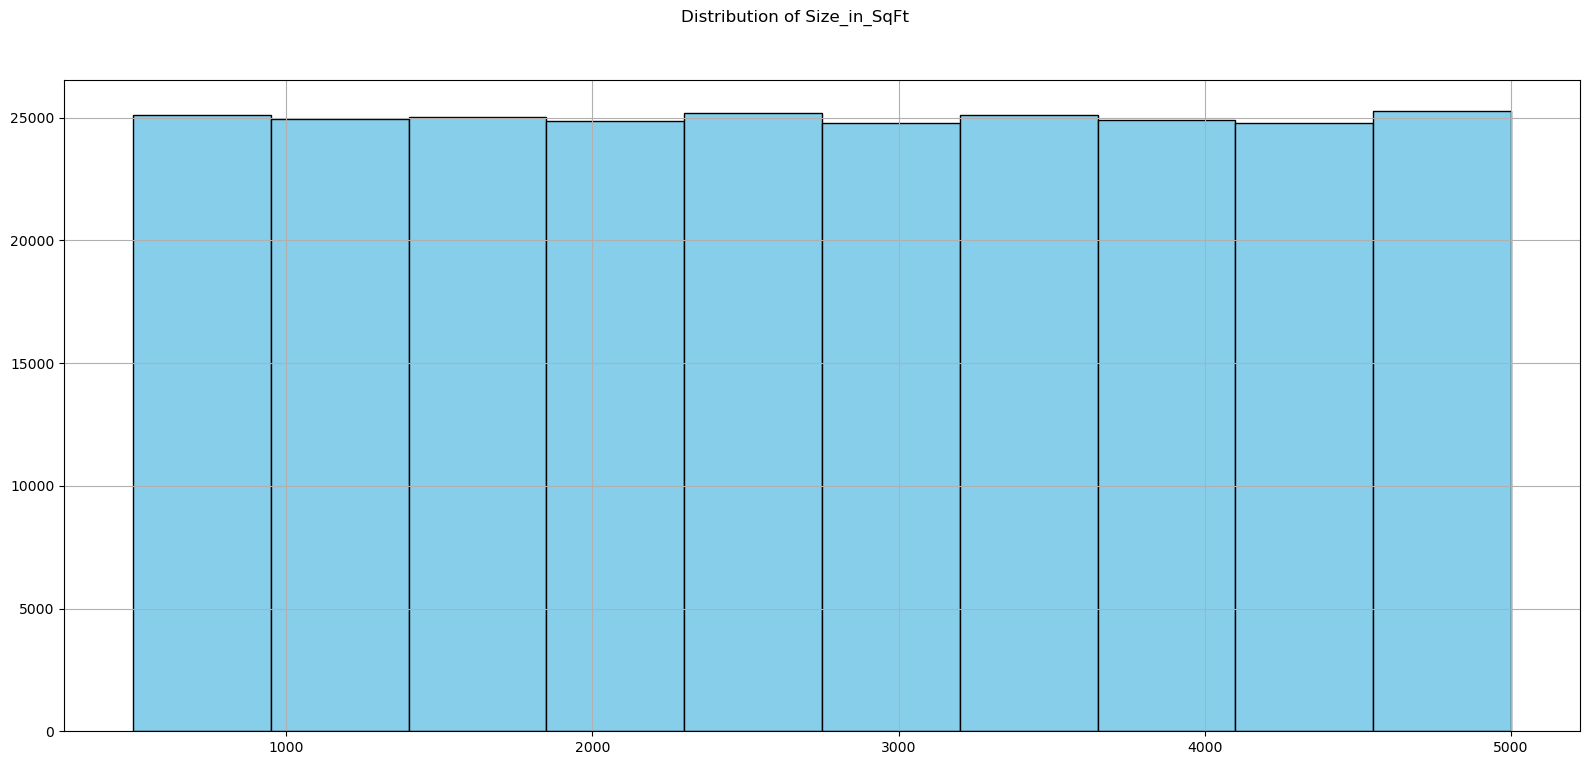

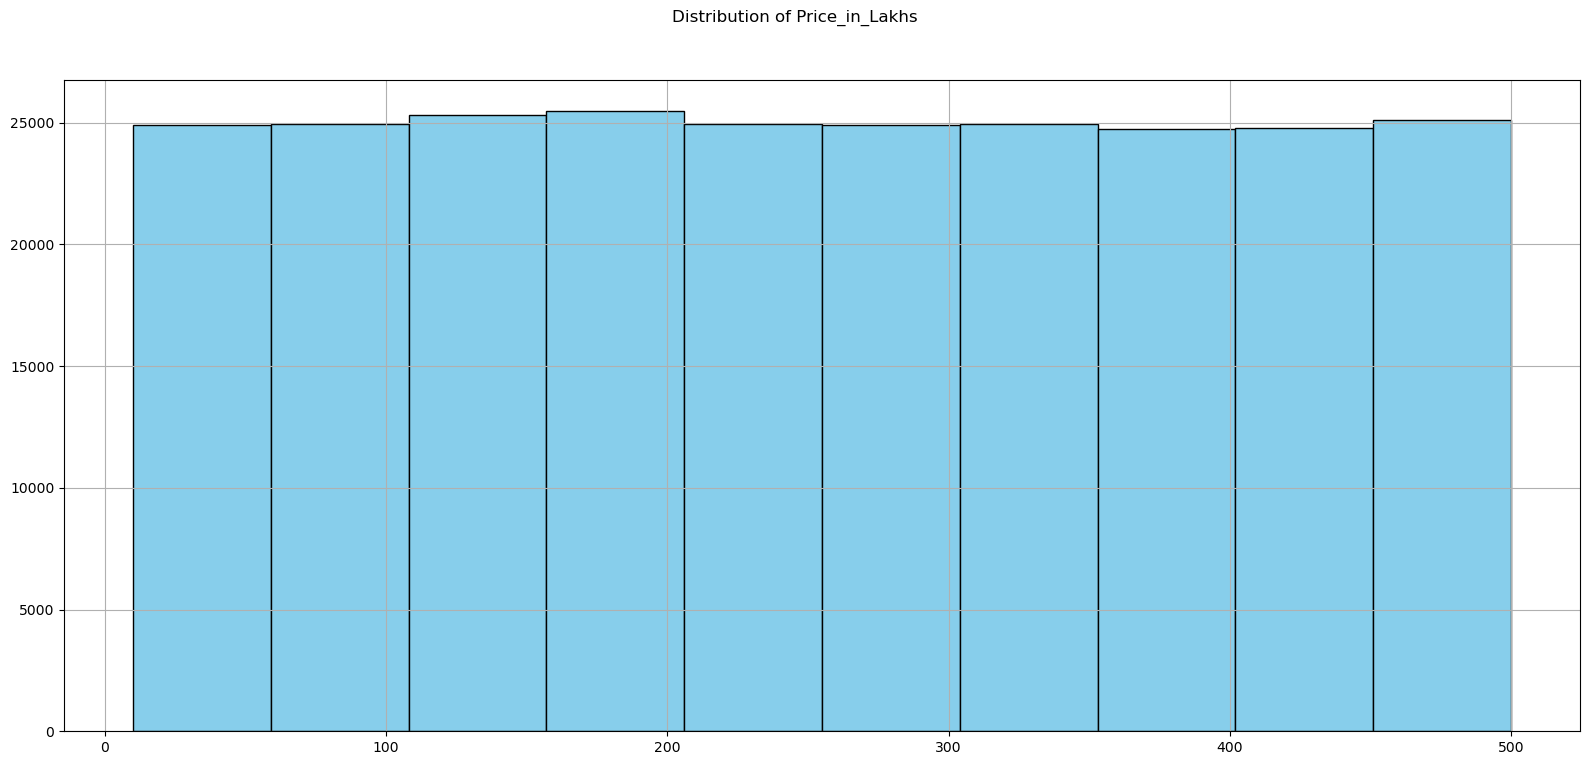

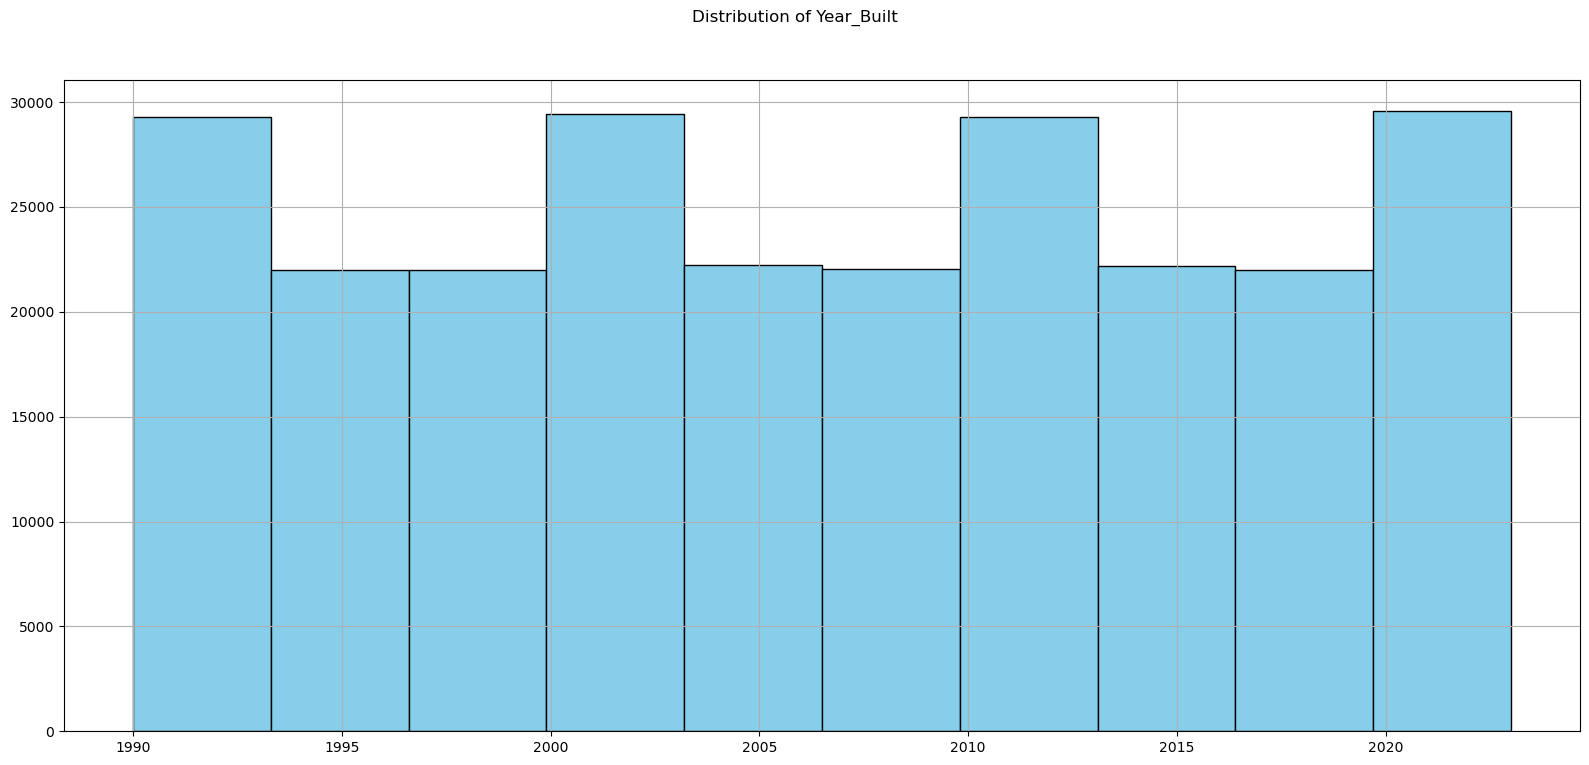

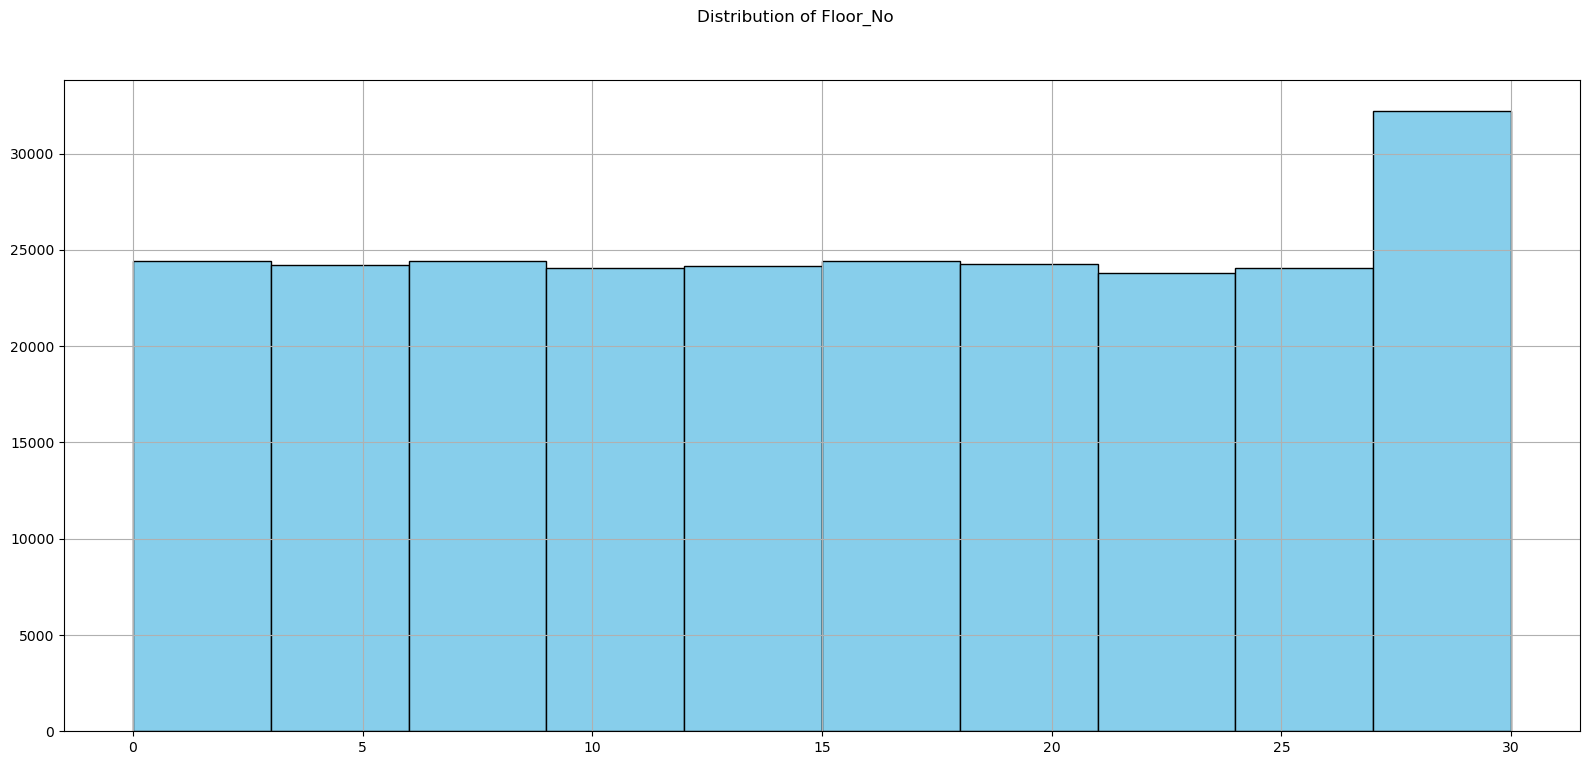

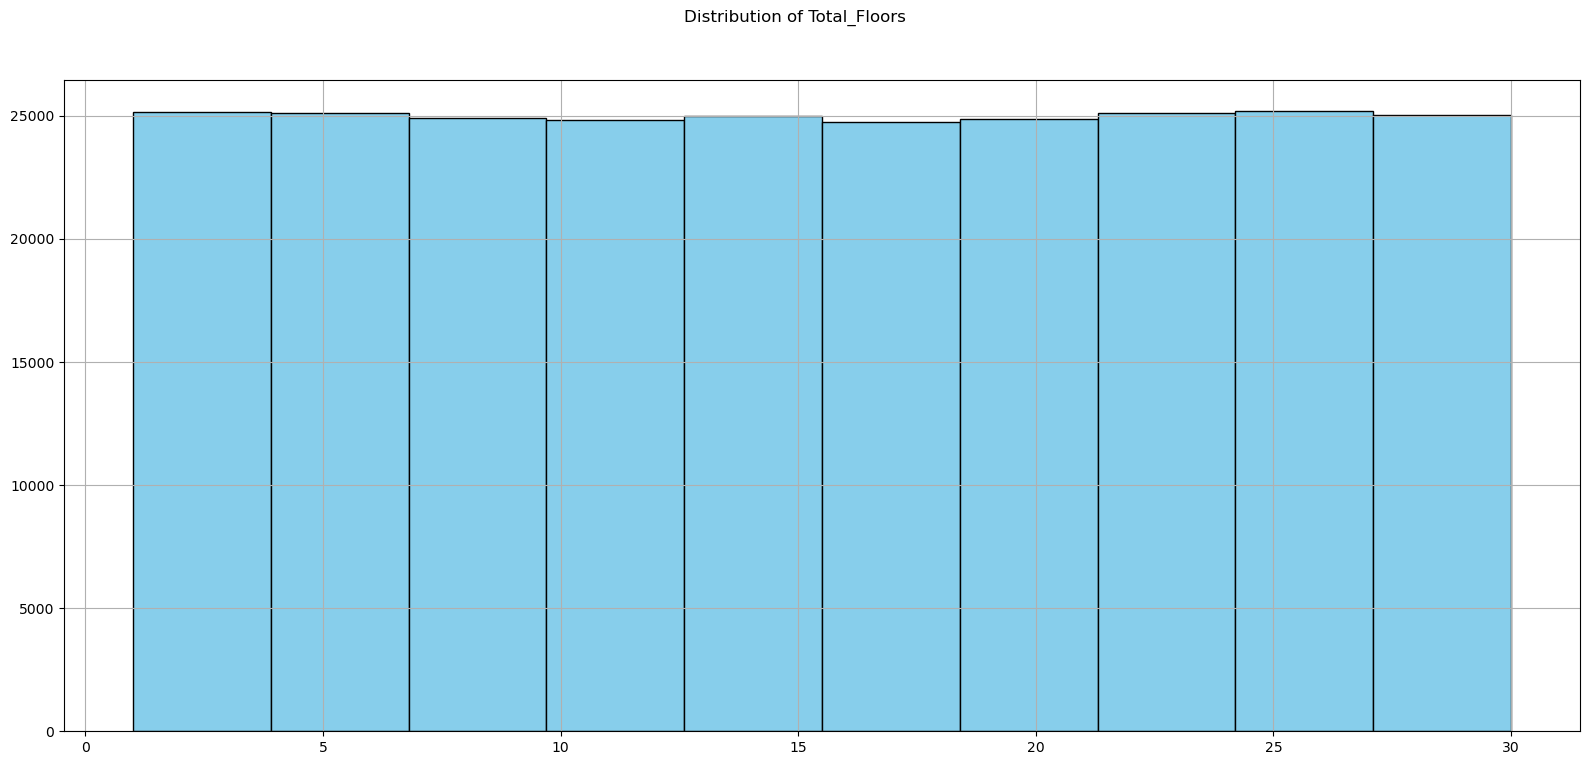

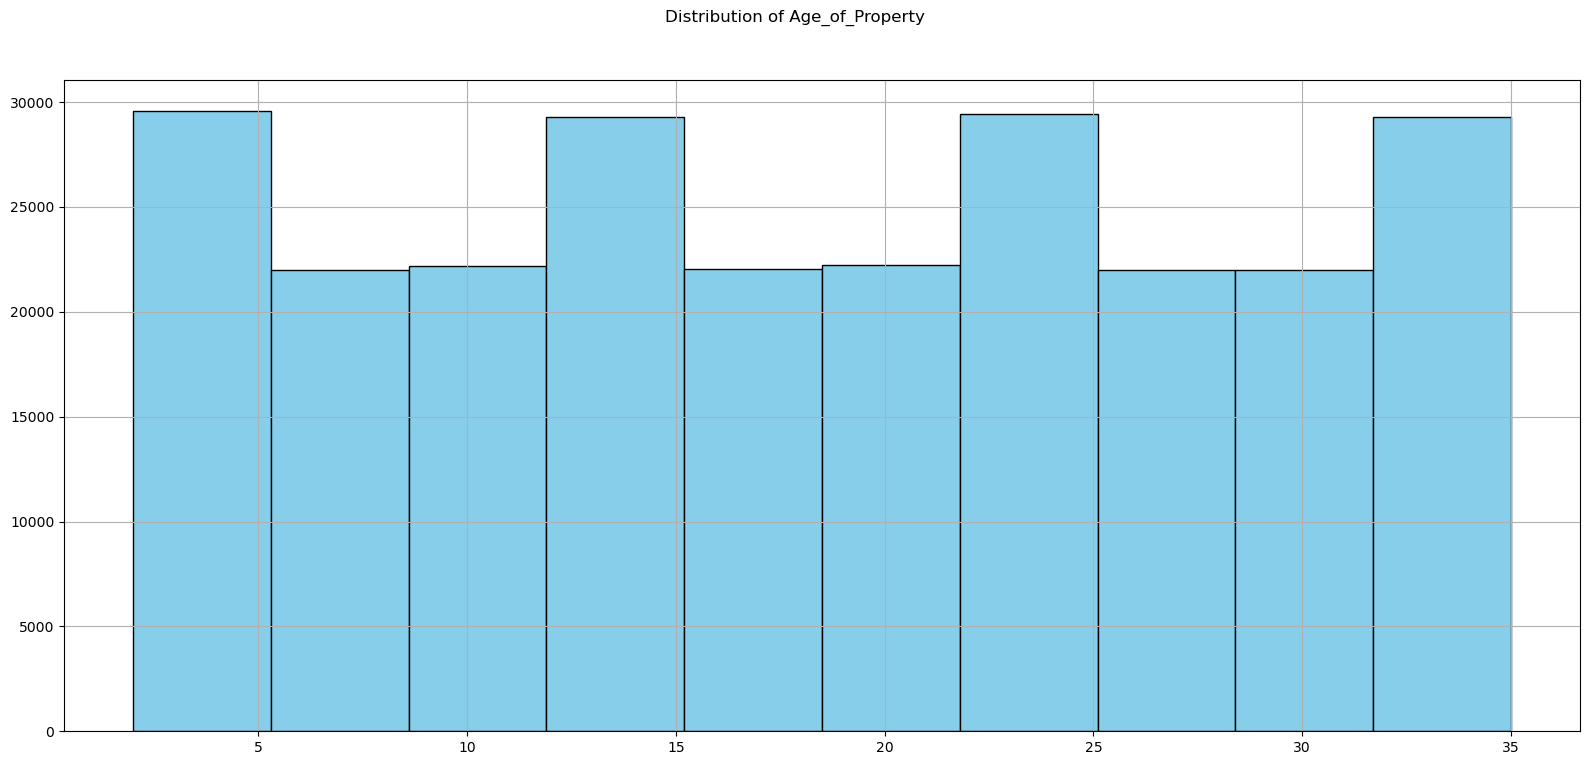

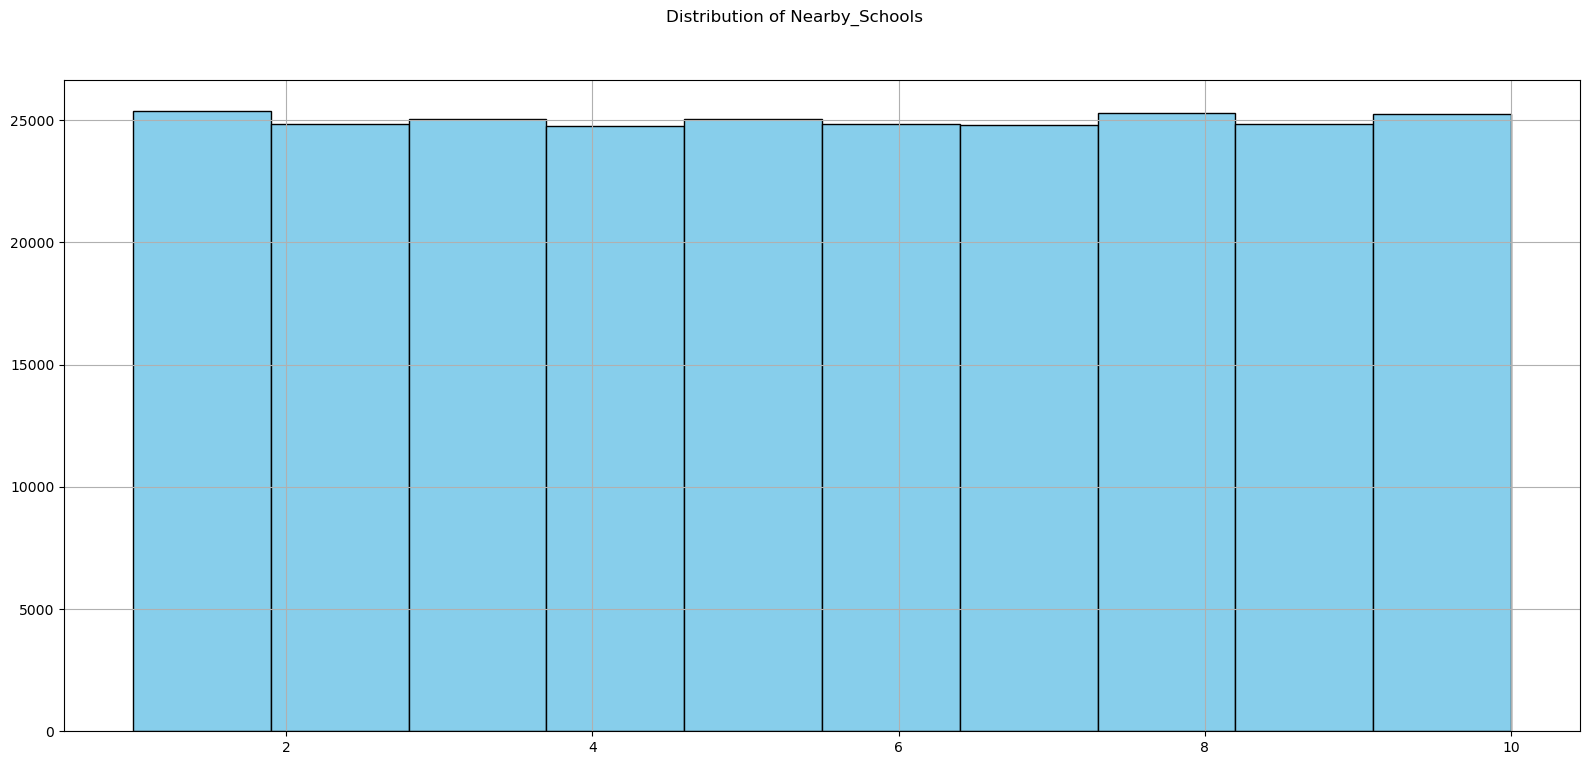

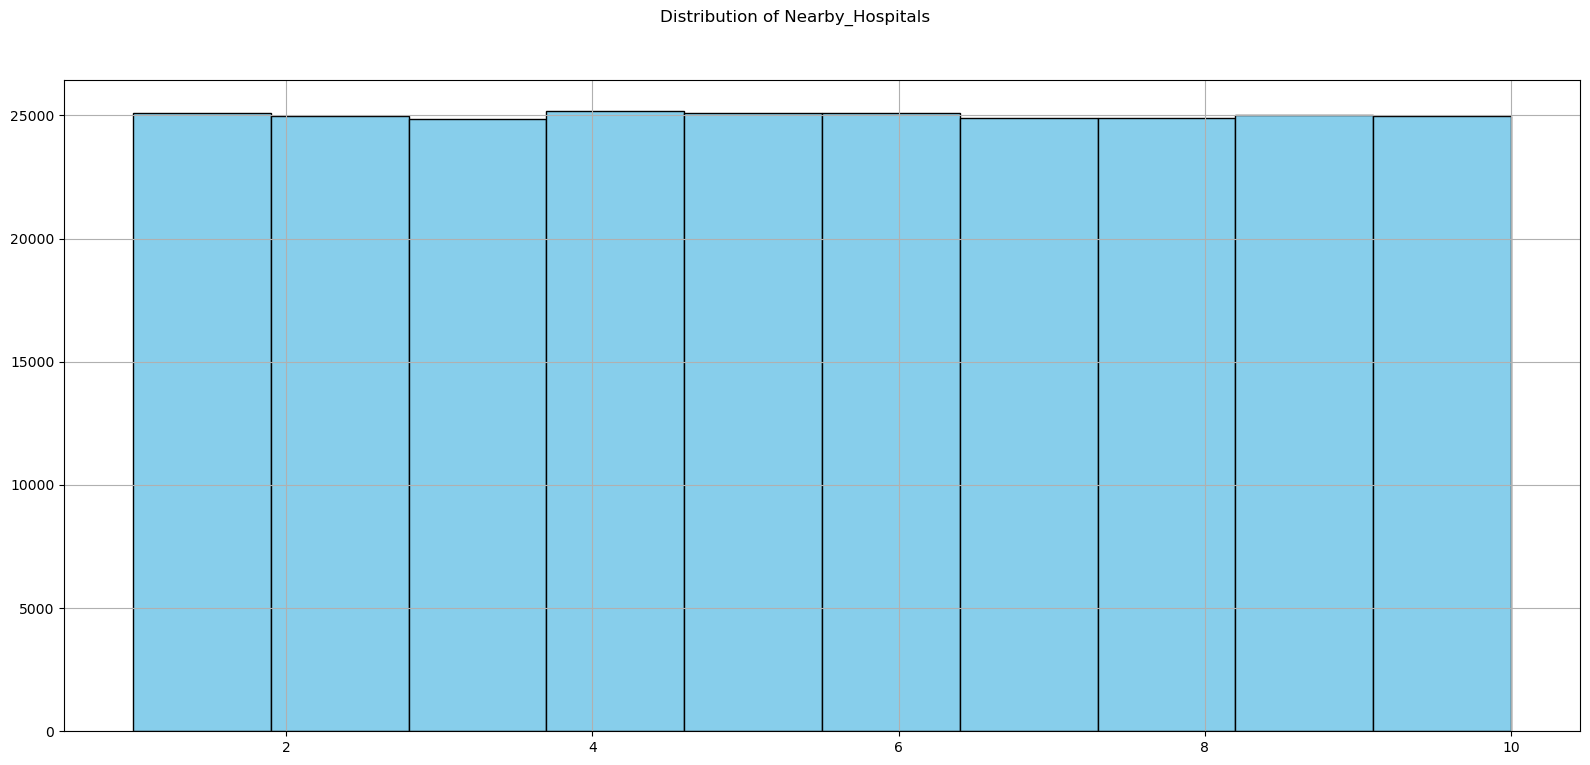

In [13]:
numerical_cols=['BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Year_Built','Floor_No', 'Total_Floors', 'Age_of_Property','Nearby_Schools', 'Nearby_Hospitals']
for cols in numerical_cols:
    plt.figure(figsize=(12,8))
    df[cols].hist(figsize=(16,8),bins=10,color='skyblue',edgecolor='black')
    plt.suptitle(f'Distribution of {cols}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# EDA (Exploratory Data Analysis)- Correlational Analysis


Correlation analysis is an important part of EDA, especially in regression problems where understanding how features relate to the target variable (in this case, house price) is crucial.



<Axes: >

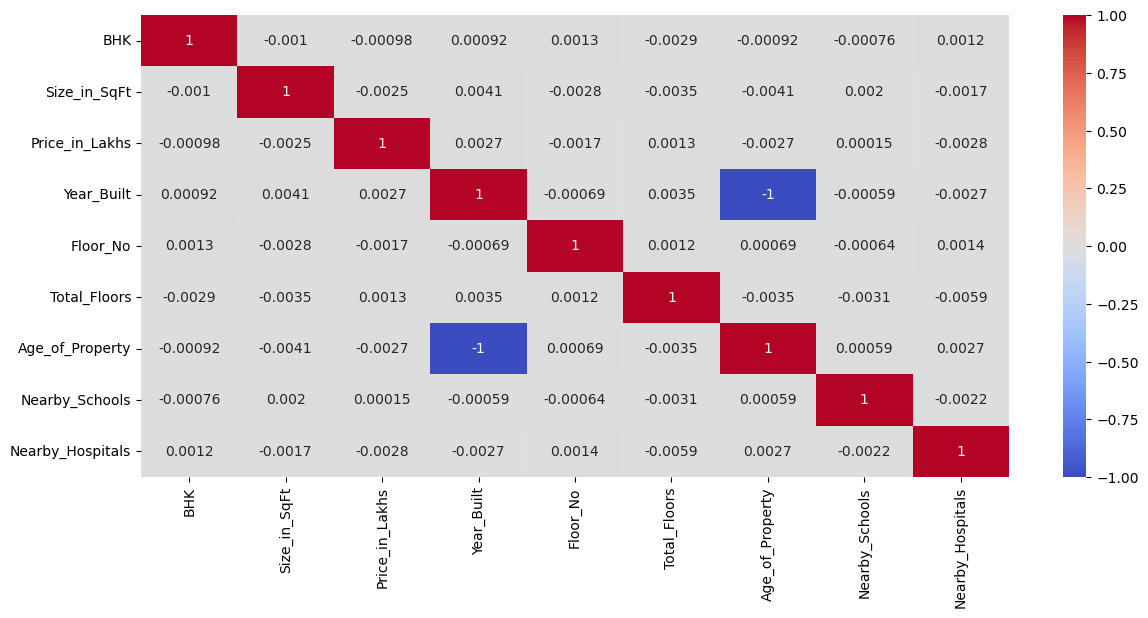

In [16]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

Features such as total floors, number of bedrooms, and number of bathrooms showed a positive correlation with the target variable (house price), as expected.

Some features, like age of the house or years built, might show a negative correlation, meaning as these values increase, the house price tends to decrease.

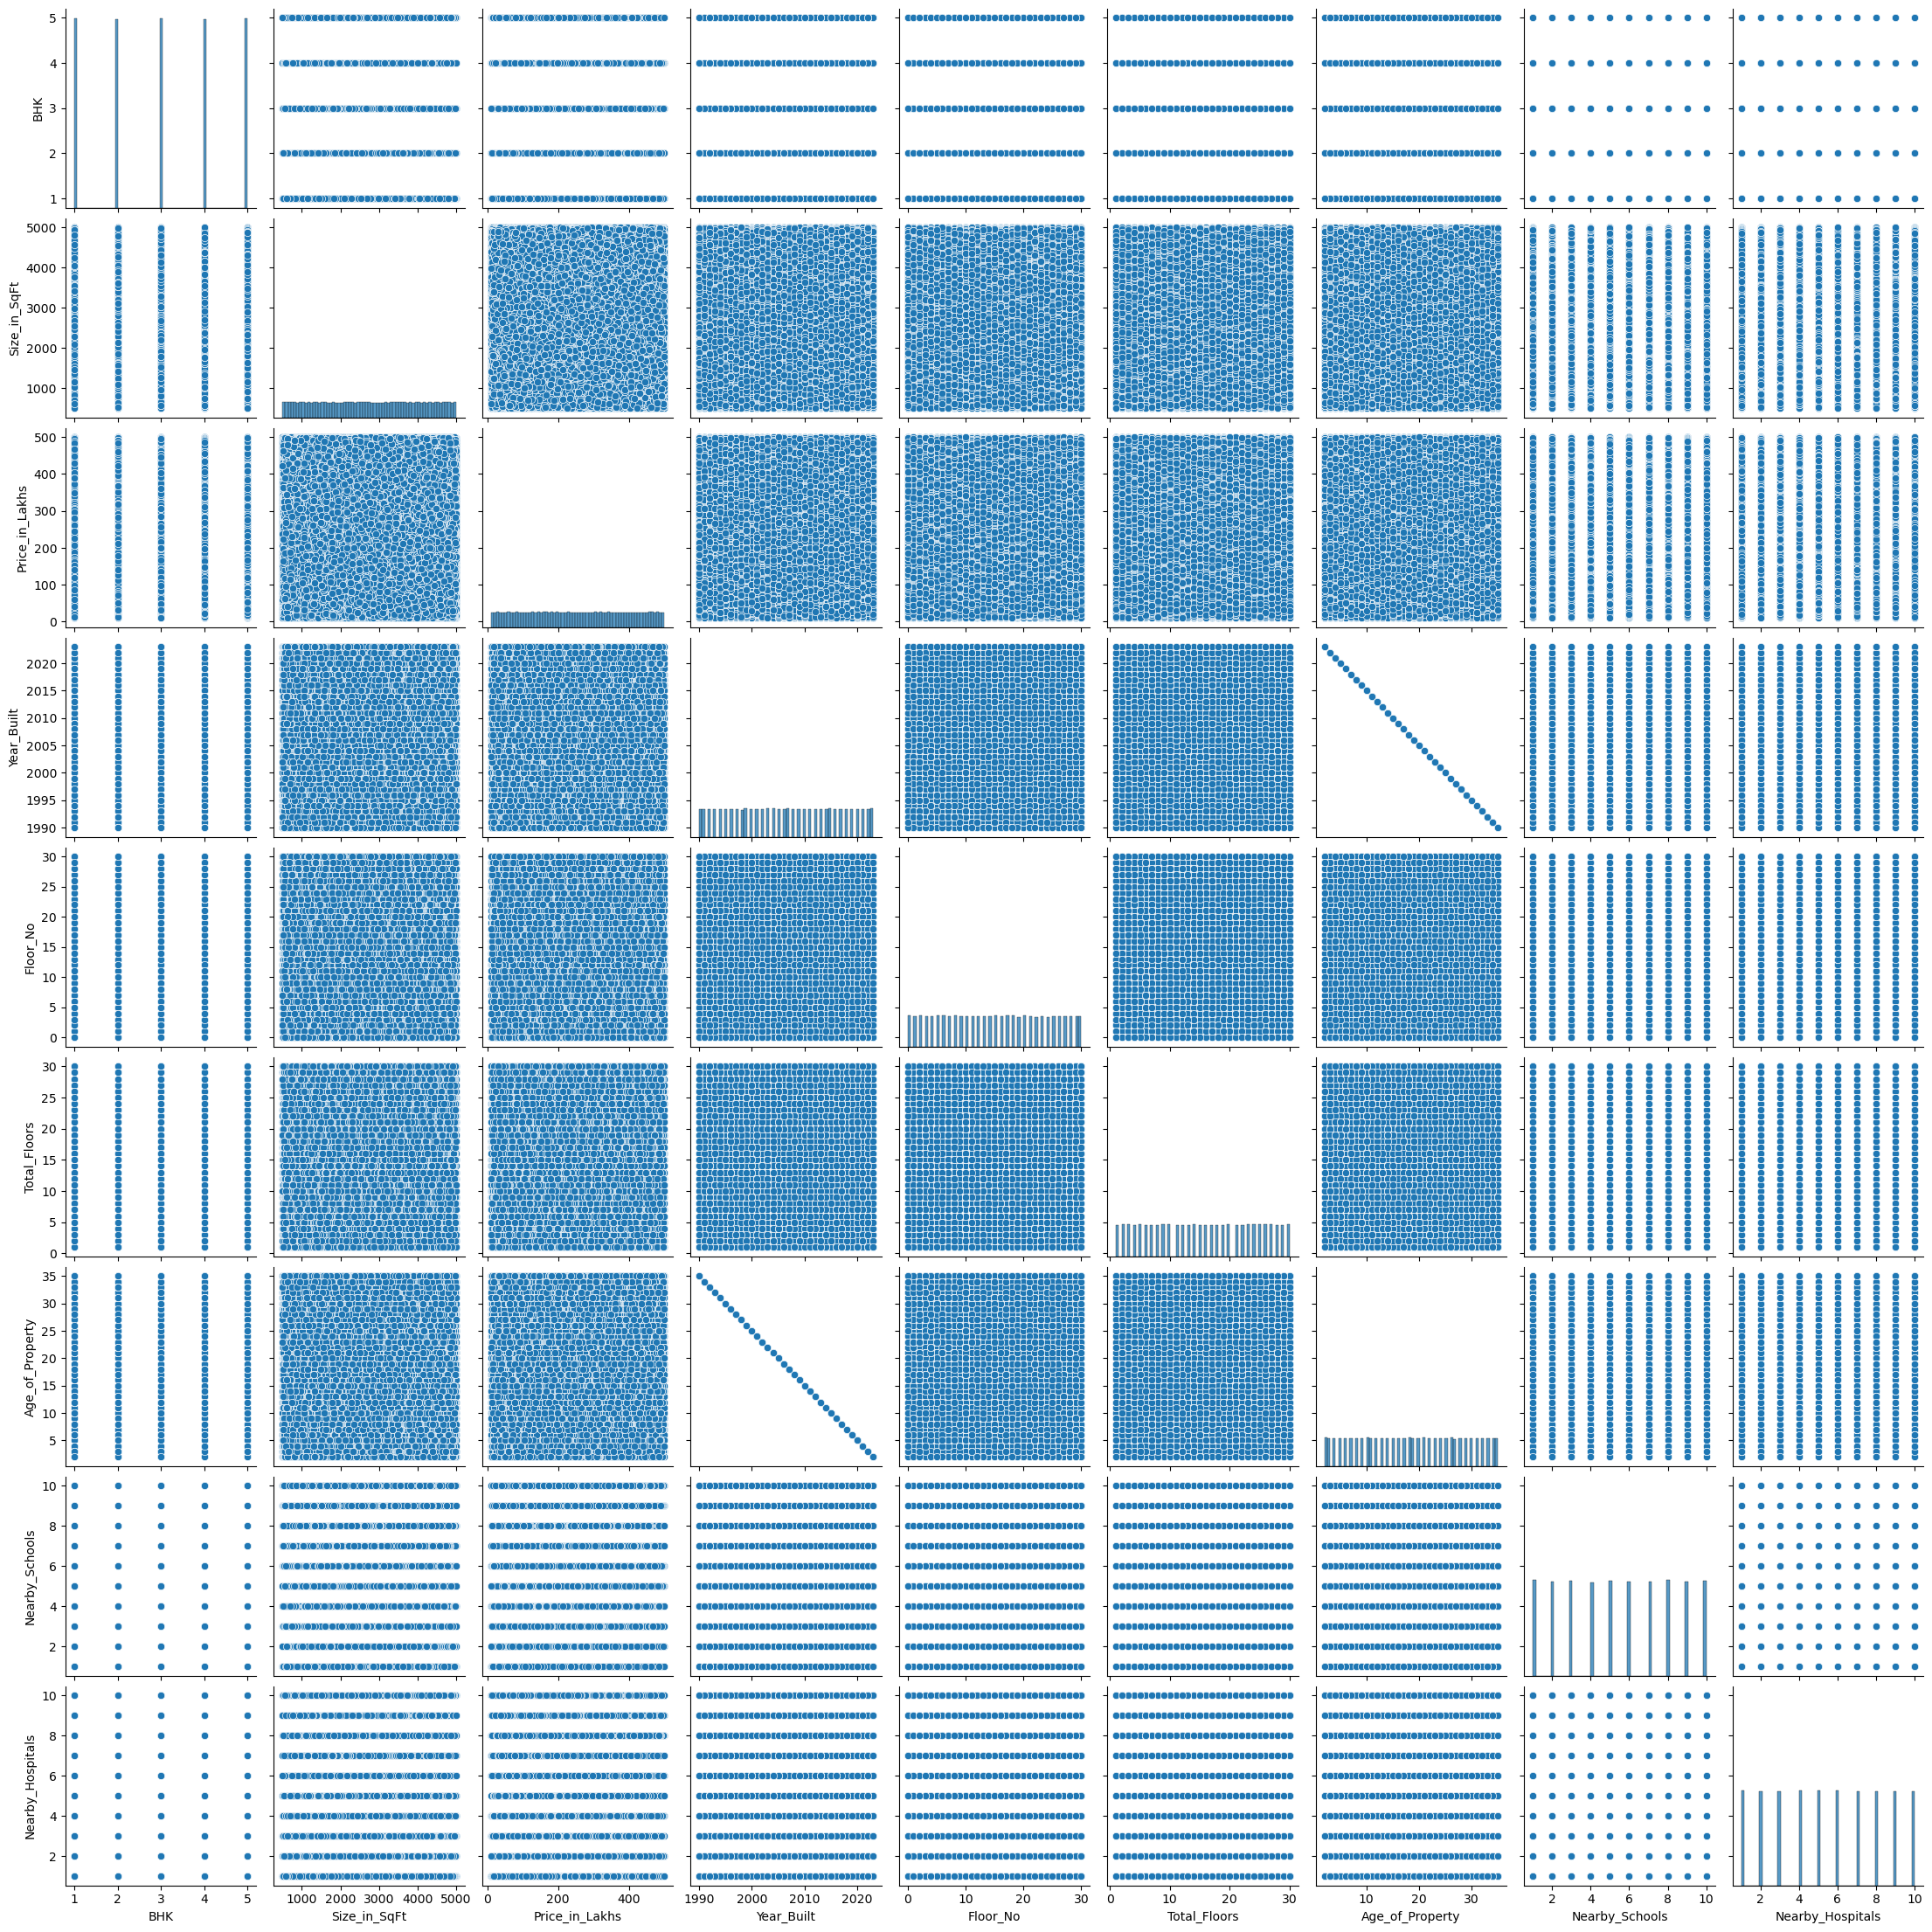

In [18]:
sns.pairplot(data=df)
plt.show()

# Data Preprocessing

Data preprocessing is a fundamental step before applying machine learning algorithms. Raw data often contains noise, missing values, inconsistent formats, and irrelevant features, which can negatively impact model performance. The goal of preprocessing is to clean and transform the data into a format suitable for analysis and modeling.

In this project, the following preprocessing steps were applied:

# Dropping Irrelevant Columns
The ID column was dropped as it serves only as a unique identifier and holds no predictive value.
The price per sq ft column was removed to avoid data leakage, as it is directly derived from the target variable (price).
And Locality,Public_Transport_Accessibility,Amenities,Furnished_Status,City ,Facing,Property_Type are also dropped.

# Encoding Categorical Variables
Categorical variables such as Parking_Space and Security status were encoded using techniques like:
One-Hot Encoding for nominal features.
Label Encoding for ordinal features if necessary.

In [22]:
df.drop(columns=["Locality","Public_Transport_Accessibility","Amenities","Furnished_Status","City","Facing","Property_Type"],inplace=True)


In [23]:
df["Parking_Space"] = df["Parking_Space"].map({"Yes": 1, "No": 0})
df["Security"] = df["Security"].map({"Yes": 1, "No": 0})

In [24]:
df.head()

,State,BHK,Size_in_SqFt,Price_in_Lakhs,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Parking_Space,Security,Owner_Type,Availability_Status
0,Tamil Nadu,1,4740,489.76,1990,22,1,35,10,3,0,0,Owner,Ready_to_Move
1,Maharashtra,3,2364,195.52,2008,21,20,17,8,1,0,1,Builder,Under_Construction
2,Punjab,2,3642,183.79,1997,19,27,28,9,8,1,0,Broker,Ready_to_Move
3,Rajasthan,2,2741,300.29,1991,21,26,34,5,7,1,1,Builder,Ready_to_Move
4,Rajasthan,4,4823,182.90,2002,3,2,23,4,9,0,1,Builder,Ready_to_Move


In [25]:
df = pd.get_dummies(df, columns=[ "Owner_Type", "Availability_Status","State"], drop_first=True)

# Splitting and Training and Testing the dataset

In [27]:
X = df.drop(columns=["Price_in_Lakhs"], errors="ignore")
y = df["Price_in_Lakhs"]

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   BHK                                     250000 non-null  int64
 1   Size_in_SqFt                            250000 non-null  int64
 2   Year_Built                              250000 non-null  int64
 3   Floor_No                                250000 non-null  int64
 4   Total_Floors                            250000 non-null  int64
 5   Age_of_Property                         250000 non-null  int64
 6   Nearby_Schools                          250000 non-null  int64
 7   Nearby_Hospitals                        250000 non-null  int64
 8   Parking_Space                           250000 non-null  int64
 9   Security                                250000 non-null  int64
 10  Owner_Type_Builder                      250000 non-null  bool 
 11  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Using Different Algorithms to choose Suitable Algorithm

In [31]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100,max_depth=3,learning_rate=0.1)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
xgb_preds = xgb_model.predict(X_test)


In [34]:
lr_preds = lr_model.predict(X_test)


In [35]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")



In [36]:
evaluate_model(y_test, xgb_preds, "XGBoost")


XGBoost Performance:
RMSE: 141.25
R² Score: -0.00


Despite being a powerful boosting algorithm, XGBoost also produced a higher RMSE than expected.

Reason: This could be due to suboptimal hyperparameters or insufficient tuning. XGBoost can also sometimes overfit or underfit depending on data distribution, regularization, and learning rate.

In [38]:
evaluate_model(y_test, lr_preds, "Linear Regression")


Linear Regression Performance:
RMSE: 141.20
R² Score: -0.00


The Linear Regression model exhibited a relatively high RMSE and moderate R² score.

Reason: The model likely struggles with capturing the non-linear relationships present in the dataset. Linear models are limited to fitting straight-line relationships and cannot handle complex patterns or interactions between variables.

In [57]:
rf=RandomForestRegressor()

In [59]:
rf.fit(X,y)

RandomForestRegressor()

In [60]:
rf_preds=rf.predict(X_test)

In [61]:
evaluate_model(y_test, rf_preds, "Random Forest")


Random Forest Performance:
RMSE: 53.36
R² Score: 0.86


The Random Forest Regressor delivered the best performance among all models, with the lowest RMSE on the test data and a good R² score.

Reason: Random Forest combines the predictions of multiple decision trees (bagging) to reduce variance and overfitting. It is robust to noise and captures non-linear patterns well.

In [45]:
dt_reg=DecisionTreeRegressor()

In [46]:
dt_reg.fit(X,y)

DecisionTreeRegressor()

In [47]:
dt_preds=dt_reg.predict(X_test)

In [48]:
evaluate_model(y_test,dt_preds,"Decision Tree")


Decision Tree Performance:
RMSE: 0.00
R² Score: 1.00


The Decision Tree Regressor showed clear signs of overfitting, with a 0 RMSE value on the training data but poor performance on the test data.

Reason: Decision Trees tend to memorize training data when not properly pruned or when max depth is too high, leading to poor generalization

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
knn = KNeighborsRegressor(n_neighbors=5)

In [52]:
from sklearn.model_selection import GridSearchCV

To improve the performance of the Random Forest Regressor, hyperparameter tuning was conducted using GridSearchCV. Grid Search is a systematic approach to testing multiple combinations of hyperparameters to find the set that results in the best model performance.

In this project, the goal was to minimize the Root Mean Squared Error (RMSE) on the validation data.

In [54]:
rf_gcv = RandomForestRegressor(random_state=42)



In [55]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


In [65]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_root_mean_squared_error', # or 'neg_mean_squared_error'
                           verbose=2)


In [ ]:
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
best_rf = grid_search.best_estimator_
rfgcv_pred = best_rf.predict(X_test)

In [ ]:
evaluate_model(y_test,rfgcv_preds,"Random Forest with Grid Search")